In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

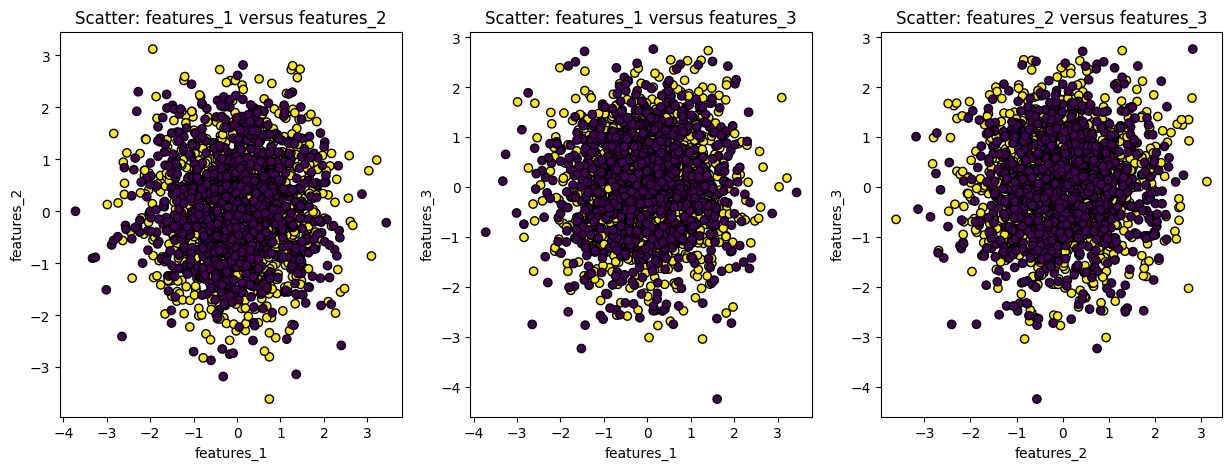

In [5]:
# Carica il file CSV
file = "../data/regression_generated.csv"
data = pd.read_csv(file)

# Estrai le colonne desiderate
features_1 = data["features_1"]
features_2 = data["features_2"]
features_3 = data["features_3"]

# Crea uno scatter plot bidimensionale
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

row = 1000

# Generate labels for both categories
labels = np.concatenate((np.ones(row), np.zeros(row)), axis=0)

ax1.scatter(x=features_1, y=features_2, marker='o', c = labels, edgecolor='black')
ax1.set_title('Scatter: features_1 versus features_2')
ax1.set_xlabel('features_1')
ax1.set_ylabel('features_2')

ax2.scatter(x=features_1, y=features_3, marker='o', c = labels, edgecolor='black')
ax2.set_title('Scatter: features_1 versus features_3')
ax2.set_xlabel('features_1')
ax2.set_ylabel('features_3')

ax3.scatter(x=features_2, y=features_3, marker='o', c = labels, edgecolor='black')
ax3.set_title('Scatter: features_2 versus features_3')
ax3.set_xlabel('features_2')
ax3.set_ylabel('features_3')

plt.show()


I believe the features are not correlated because they don't follow a path

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [6]:
# from IPython.display import Image
# Image('images/two_categories_scatter_plot.png')

In [7]:
def generate_data(n_samples_per_category, mean1, std1, mean2, std2):
    # Generate data for category 1
    data1 = np.random.normal(mean1, std1, size=(n_samples_per_category, 2))

    # Generate data for category 2
    data2 = np.random.normal(mean2, std2, size=(n_samples_per_category, 2))

    # Combine data for both categories
    data = np.concatenate((data1, data2), axis=0)

    # Generate labels for both categories
    labels = np.concatenate((np.ones(n_samples_per_category), np.zeros(n_samples_per_category)), axis=0)

    return data, labels

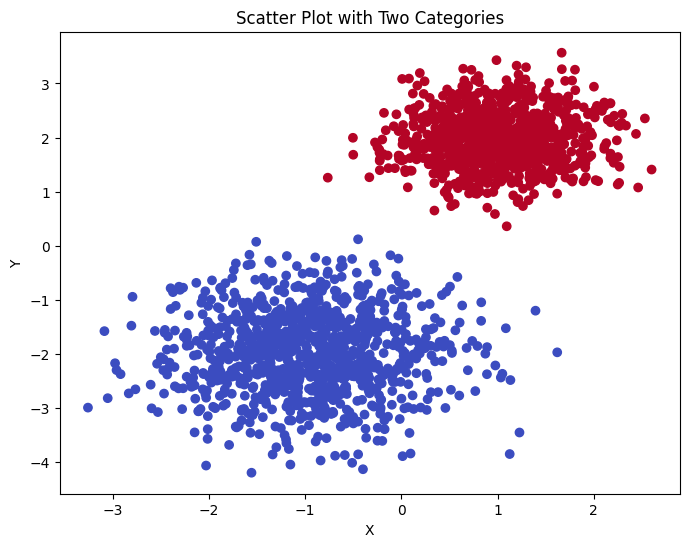

In [8]:
# Set parameters for category 1
mean1 = np.array([1, 2])
std1 = np.array([0.5, 0.5])

# Set parameters for category 2
mean2 = np.array([-1, -2])
std2 = np.array([0.75, 0.75])

# Generate data and labels
n_samples_per_category = 1000
data, labels = generate_data(n_samples_per_category, mean1, std1, mean2, std2)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Two Categories')

# Show plot
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

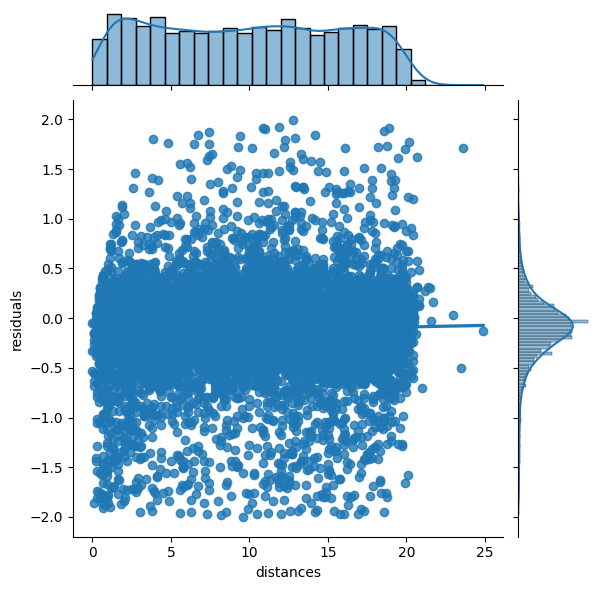

Pearson correlation coefficient: 0.043403510522559086
There is a positive correlation between 'distances' and 'residuals'.


In [20]:
filename = "../data/residuals_261.pkl"

# Load the data from the pickle file
data_array = pd.read_pickle(filename)

data = pd.DataFrame(data_array.tolist())

data = data[data["residuals"].abs() < 2]

# Reset degli indici in modo che siano numeri continui
data.reset_index(drop=True, inplace=True)

# Plot a Seaborn jointplot with linear regression
sns.jointplot(x='distances', y='residuals', data=data, kind='reg')

# Display the plot
plt.show()

# Calculate the Pearson correlation coefficient
correlation_coefficient = data['distances'].corr(data['residuals'])

# Print the correlation coefficient
print(f"Pearson correlation coefficient: {correlation_coefficient}")

# Comment on the correlation
if correlation_coefficient > 0:
    print("There is a positive correlation between 'distances' and 'residuals'.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between 'distances' and 'residuals'.")
else:
    print("There is no linear correlation between 'distances' and 'residuals'.")


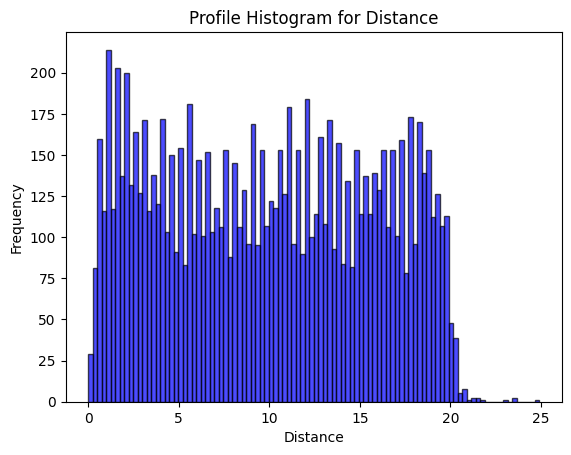

In [25]:
#  Set up the figure and axis
fig, ax = plt.subplots()

# Create a histogram for the 'distances' variable
ax.hist(data['distances'], bins=100, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
ax.set_xlabel('Distance')
ax.set_ylabel('Frequency')
ax.set_title('Profile Histogram for Distance')

# Show the plot
plt.show()


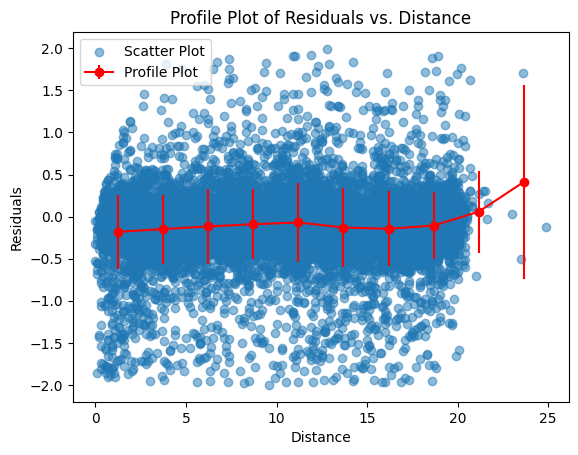

In [26]:
# Create the profile histogram
hist, bin_edges = np.histogram(data['distances'], bins=10)
x = (bin_edges[:-1] + bin_edges[1:]) / 2  # Bin centers

# Calculate mean and standard deviation of residuals in each bin
y = [data.loc[(data['distances'] >= bin_edges[i]) & (data['distances'] < bin_edges[i + 1]), 'residuals'].mean() for i in range(len(bin_edges) - 1)]
err_y = [data.loc[(data['distances'] >= bin_edges[i]) & (data['distances'] < bin_edges[i + 1]), 'residuals'].std() for i in range(len(bin_edges) - 1)]

# Convert to numpy arrays
x = np.array(x)
y = np.array(y)
err_y = np.array(err_y)

# Plot the scatter plot of residuals
plt.scatter(data['distances'], data['residuals'], alpha=0.5, label='Scatter Plot')

# Plot the profile plot on top
plt.errorbar(x, y, yerr=err_y, fmt='o-', color='red', label='Profile Plot')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.title('Profile Plot of Residuals vs. Distance')

# Add legend
plt.legend()

# Show the plot
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


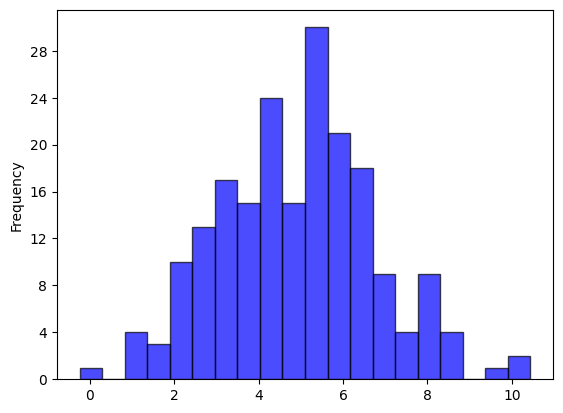

In [28]:
# Set the seed for reproducibility
np.random.seed(42)

# Generate normally distributed data
N = 200
mean_value = 5
std_dev = 2
x = np.random.normal(mean_value, std_dev, N)

# Create histogram with proper aesthetics
fig, ax = plt.subplots()

# Set a meaningful number of bins
num_bins = 20

# Plot histogram as data points with errors
counts, edges, _ = ax.hist(x, bins=num_bins, color='blue', alpha=0.7, edgecolor='black')

# Calculate Poisson uncertainty for each bin
errors = np.sqrt(counts)

# Set y-axis label
ax.set_ylabel('Frequency')

# Set y-axis major ticks to display only integer labels
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show the plot
plt.show()


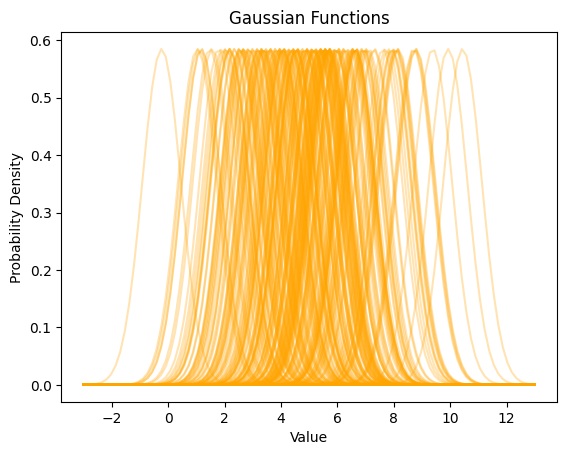

In [29]:
from scipy.stats import norm

# Calculate default standard deviation for Gaussian functions
default_std_dev = 1.06 * np.std(x) * N**(-1/5)

# Generate Gaussian functions
gaussians = [norm(loc=value, scale=default_std_dev) for value in x]

# Plot Gaussian functions
fig, ax = plt.subplots()

for gaussian in gaussians:
    x_values = np.linspace(mean_value - 4 * std_dev, mean_value + 4 * std_dev, 100)
    y_values = gaussian.pdf(x_values)
    ax.plot(x_values, y_values, color='orange', alpha=0.3)

# Set labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.set_title('Gaussian Functions')

# Show the plot
plt.show()


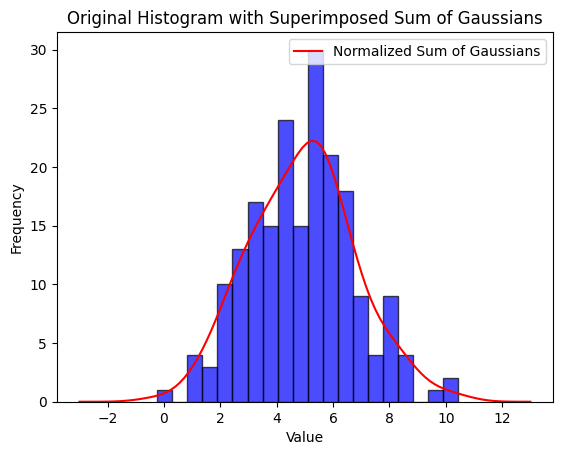

In [34]:
from scipy.integrate import trapz

from scipy.integrate import trapz

# Calculate the sum of Gaussian functions
sum_of_gaussians = np.sum([gaussian.pdf(x_values) for gaussian in gaussians], axis=0)

# Normalize the sum to match the integral of the original histogram
area_under_hist = trapz(counts, edges[:-1])
area_under_sum = trapz(sum_of_gaussians, x=x_values)  # Use x_values here

# Ensure that both arrays have the same shape for broadcasting
normalized_sum = sum_of_gaussians * (area_under_hist / area_under_sum)

# Superimpose the normalized sum to the original histogram
fig, ax = plt.subplots()

ax.hist(x, bins=num_bins, color='blue', alpha=0.7, edgecolor='black')
ax.plot(x_values, normalized_sum, color='red', label='Normalized Sum of Gaussians')

# Set labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Original Histogram with Superimposed Sum of Gaussians')

# Add legend
ax.legend()

# Show the plot
plt.show()
